# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [3]:
dataset = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', dataset.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [5]:
desc = dataset.describe(include='all')
display(desc)
print(dataset.shape)

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


(284580, 6)


In [6]:
display(100*dataset.isnull().sum()/dataset.shape[0]) #no missing values

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [7]:
#Removing outlier from age
dataset = dataset.loc[dataset['age'] < 70,:]

dataset['new_user'].replace({1 : 'Yes', 0 : 'No'}, inplace = True)

# Explore dataset

In [8]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
#data_sample = data.sample(10000)

In [9]:
data=dataset.sample(1000)

Text(0, 0.5, 'Convertion, %')

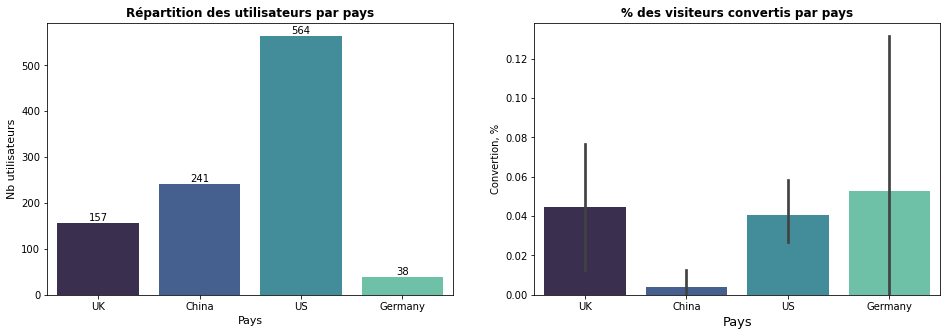

In [10]:
#Répartition des utilisateurs par pays
plt.figure(figsize=(16,5))
plt.subplot(121) 
ax1 = sns.countplot(x='country', data=data, palette='mako')
ax1.set_title('Répartition des utilisateurs par pays', fontsize = 12,fontweight='bold' )
ax1.set_xlabel('Pays', fontsize = 11)
ax1.set_ylabel('Nb utilisateurs', fontsize = 11)
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 10)
    
plt.subplot(122)
ax2 = sns.barplot(x='country', y='converted', data=data, palette='mako')
ax2.set_title('% des visiteurs convertis par pays', fontsize = 12,fontweight='bold')
ax2.set_xlabel('Pays', fontsize = 13)
ax2.set_ylabel('Convertion, %')

Text(0, 0.5, 'Convertion, %')

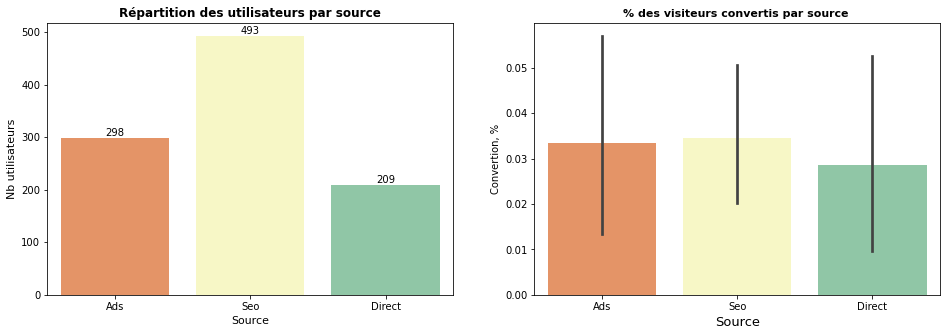

In [11]:
#Répartition des utilisateurs par source
plt.figure(figsize=(16,5))
plt.subplot(121) 
ax1 = sns.countplot(x='source', data=data, palette='Spectral')
ax1.set_title('Répartition des utilisateurs par source',fontsize = 12, fontweight='bold' )
ax1.set_xlabel('Source', fontsize = 11)
ax1.set_ylabel('Nb utilisateurs', fontsize = 11)
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 10)
    
plt.subplot(122)
ax2 = sns.barplot(x="source", y='converted', data=data,  palette='Spectral')
ax2.set_title('% des visiteurs convertis par source ',fontsize = 11, fontweight='bold')
ax2.set_xlabel('Source', fontsize = 13)
ax2.set_ylabel('Convertion, %')
 

Visualisation des variables

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



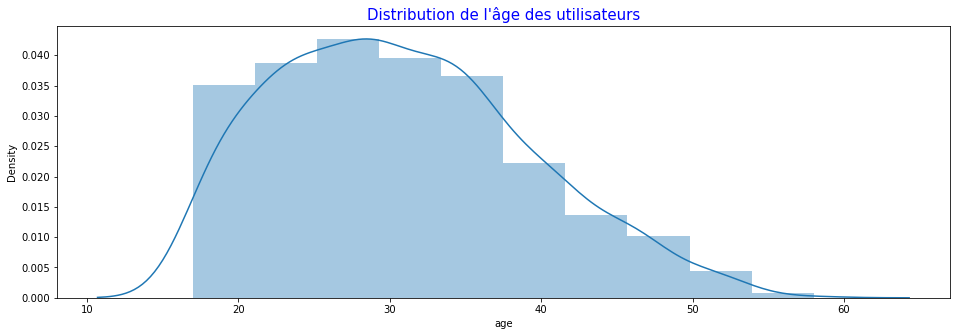

In [12]:
fig, ax = plt.subplots(figsize=(16,5))
sns.distplot(data.age, ax=ax,norm_hist=True, bins=10)
plt.title("Distribution de l'âge des utilisateurs", fontsize=15, color='b')
plt.show()

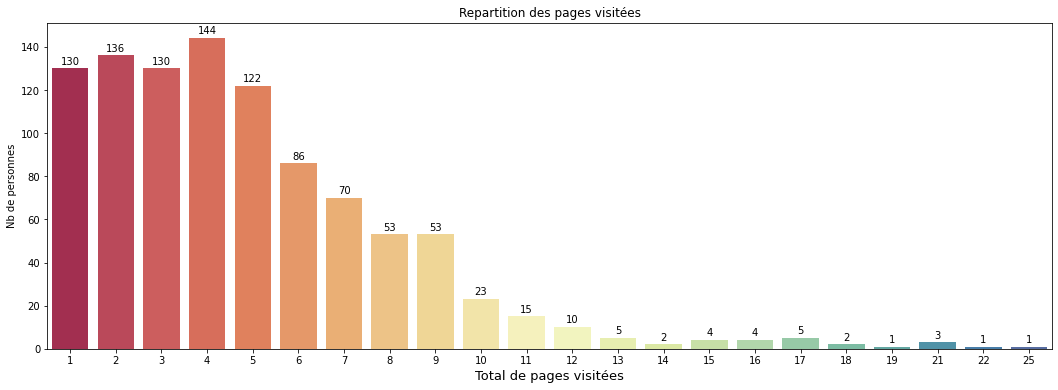

In [13]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x = data["total_pages_visited"], palette='Spectral');
ax.set_ylabel("Nb de personnes")
ax.set_title("Repartition des pages visitées")
ax.set_xlabel("Total de pages visitées", fontsize=13)
ax.set_xticklabels(ax.get_xticklabels(), 
                    fontsize=10, 
                    rotation=0)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 2,rect.get_height(),horizontalalignment='center', fontsize = 10)
plt.show();

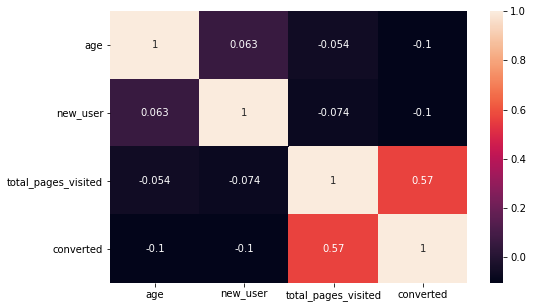

In [14]:
# Correlation matrix
plt.figure(figsize= (8,5))
sns.heatmap(data.corr(), annot= True,);

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [15]:
# Preprocessing

In [16]:
features_list = ['country','age','new_user','source','total_pages_visited']
numeric_indices = [1,4]
categorical_indices = [0,2,3]
target_variable = 'converted'

In [17]:
# Separate target variable Y from features X
X = data.loc[:, features_list]
Y = data[target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [18]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [19]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.to_list()
Y_test = Y_test.to_list()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 33 1 'Seo' 2]
 ['US' 50 1 'Ads' 6]
 ['US' 37 0 'Seo' 4]
 ['US' 27 1 'Seo' 3]
 ['UK' 28 1 'Direct' 3]]
[['US' 34 1 'Seo' 7]
 ['US' 19 1 'Direct' 7]]

[0, 0, 0, 0, 0]
[0, 0]


## Training pipeline

In [20]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['US' 33 1 'Seo' 2]
 ['US' 50 1 'Ads' 6]
 ['US' 37 0 'Seo' 4]
 ['US' 27 1 'Seo' 3]
 ['UK' 28 1 'Direct' 3]]
...Done
[[ 0.          0.          1.          1.          0.          1.
   0.26057356 -0.84266608]
 [ 0.          0.          1.          1.          0.          0.
   2.28444585  0.31315538]
 [ 0.          0.          1.          0.          0.          1.
   0.7367788  -0.26475535]
 [ 0.          0.          1.          1.          0.          1.
  -0.45373431 -0.55371072]
 [ 0.          1.          0.          1.          1.          0.
  -0.334683   -0.55371072]]


In [21]:
# Train model
print("Train model...")
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [22]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [23]:
## Test pipeline

In [24]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

...Done
[[ 0.          0.          1.          1.          0.          1.
   0.37962487  0.60211074]
 [ 0.          0.          1.          1.          1.          0.
  -1.4061448   0.60211074]
 [ 0.          0.          0.          1.          1.          0.
   0.02247093  0.60211074]
 [ 0.          0.          1.          1.          1.          0.
  -0.09658038  0.89106611]
 [ 0.          0.          0.          1.          0.          1.
   0.14152225 -0.26475535]]


In [25]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



In [26]:
#Model's Performance assessment on training dataset¶

In [27]:
# Print f1 scores
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.8085106382978724
f1-score on test set :  0.6666666666666666


In [28]:
# Perform grid search
print("Grid search...")

# Grid of values to be tested
params = {
    'C': np.arange(1,3,0.1) # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3,scoring="f1") # cv : the number of folds (repetitions) to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
# Predictions on training set
# The model has already been re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print(sklearn.metrics.classification_report(Y_train, gridsearch.predict(X_train)))

Grid search...
...Done.
Best hyperparameters :  {'C': 1.0}
Predictions on training set...
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       773
           1       0.95      0.70      0.81        27

    accuracy                           0.99       800
   macro avg       0.97      0.85      0.90       800
weighted avg       0.99      0.99      0.99       800



In [29]:
# Visualize ROC curves on Gridsearch
probas_train = gridsearch.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(Y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = fpr, 
        y = tpr, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = gridsearch.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(Y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show()

In [30]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score 
print("3-fold cross-validation...")
regressor = LogisticRegression()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.9887499647996396
The standard deviation is :  1.9912330860454873e-05


**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [31]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

gridsearch.fit(X,Y)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])},
             scoring='f1')

In [32]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country','age','new_user','source','total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [33]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.          1.          0.          0.          0.          1.
  -0.334683    3.20270903]
 [ 0.          1.          0.          1.          1.          0.
  -1.04899087  0.02420001]
 [ 0.          0.          0.          1.          0.          1.
   0.14152225 -1.13162145]
 [ 0.          0.          1.          1.          0.          0.
   0.14152225  0.31315538]
 [ 0.          0.          0.          0.          0.          1.
  -0.69183693 -0.55371072]]


In [34]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': gridsearch.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)
